# Lab06_108032053

## 1. Loading of dataset and Preprocessing

In [35]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from IPython.display import display

import matplotlib
matplotlib.rcParams.update({'font.size': 22})
plt = matplotlib.pyplot

if not os.path.exists("output/"):
  os.mkdir("output/")

import warnings
warnings.filterwarnings("ignore")

In [36]:
# Load the data
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
          'arrhythmia/arrhythmia.data', header=None, sep=',', engine='python')
display(data.head(3))

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10


In [37]:
# Preprocessing
data['arrhythmia'] = data[len(data.columns)-1].map(lambda x: 0 if x==1 else 1)
data = data.drop(len(data.columns)-2, axis=1)
data = data._get_numeric_data()
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,arrhythmia
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,1
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,1
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,1


## 2. Splitting of dataset to training and testing data (test_size = 20% of the whole dataset)

In [38]:
X = data.iloc[:, :-1].values  # The first to second-last columns are the features
y = data.iloc[:, -1].values   # The last column is the ground-truth label
print(np.unique(y))
print(X.shape)

[0 1]
(452, 274)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the dataset to training and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20181004)

# Standardizing the training and test datasets
# Note that we are scaling based on the information from the training data
# Then we apply the scaling that is done from training data to the test data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 3. Building of a self-designed Logistic Regression model (Complete the TODO parts provided below)

In [40]:
class LogisticRegression(object):

    def __init__(self, eta=0.05, n_epoch=100, random_state=1):
        """Feel free to change the hyperparameters"""
        self.eta = eta
        self.n_epoch = n_epoch
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_epoch):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            gradient_weights, gradient_bias = self.gradient(X, output, y)
            self.w_[1:] += self.eta * gradient_weights
            self.w_[0] += self.eta * gradient_bias
            cost = self.loss(output, y)
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def loss(self, output, y):
        """Calculate cross entropy loss"""
        # TODO
        eps = 1e-10 # prevent numeric issue (log 0 = -inf)
        return - np.sum(y * np.log(np.maximum(output, 1e-10)) + (1 - y) * np.log(np.maximum(1 - output, 1e-10)))

    def gradient(self, X, output, y):
        """Calculate the partial derivative of cross entropy loss with respect to weights"""
        errors = (y - output)
        return errors.dot(X), errors.sum()

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        # TODO
        return 1.0 / (1.0 + np.exp(-z));

    def predict(self, X):
        """Return class label after unit step"""
        # TODO
        net_input = self.net_input(X)
        output = self.activation(net_input)
        return (output >= 0.5).astype(int)


--> Accuracy rate: 0.78022



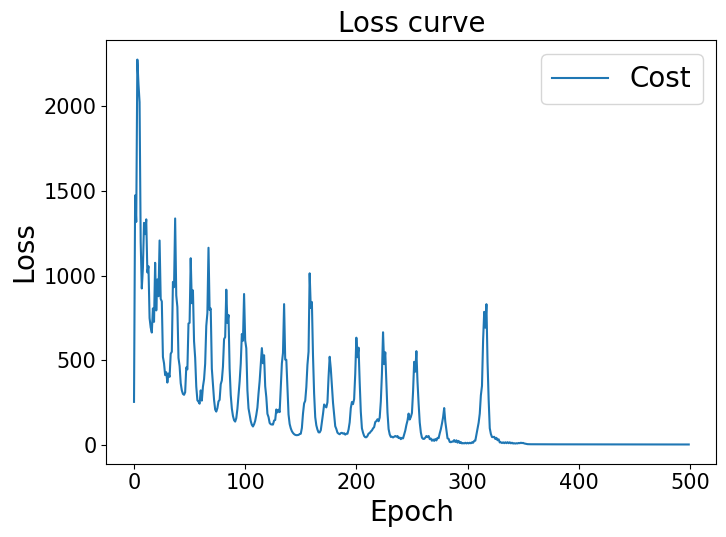

In [41]:
from sklearn.metrics import accuracy_score

lr = LogisticRegression(eta=0.05, n_epoch=500)
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)

print(f'\n--> Accuracy rate: {accuracy_score(y_test, y_pred):.5f}\n')

fig, ax = plt.subplots(figsize=(8,6))
cost = np.array(lr.cost_)
plt.plot(range(len(cost)), cost, label='Cost')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss curve')
plt.tight_layout()
plt.legend(loc=1, prop={'size': 20})
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
  item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
  item.set_fontsize(15)
plt.savefig('./output/loss_curve.png', dpi=300)
plt.show()

## 4. Plotting of the confusion matrix. (Label 0 as positive)

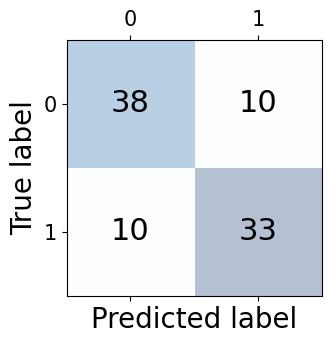

In [42]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(4,4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=1-j, y=1-i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('./output/confusion_matrix.png', dpi=300)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
  item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
  item.set_fontsize(15)
plt.show()

## 5. Computing the F1-score of this confusion matrix. The F1-score should be at least 0.75

In [43]:
from sklearn.metrics import f1_score

print('\n--> F1 score:')
f = f1_score(y_true=y_test, y_pred=y_pred, average=None)
print(f'\nIndividual: {f[0]:.5f}, {f[1]:.5f}')
f = f1_score(y_true=y_test, y_pred=y_pred, average='micro')
print(f'\nMicro: {f:.5f}')
f = f1_score(y_true=y_test, y_pred=y_pred, average='macro')
print(f'\nMacro: {f:.5f}')


--> F1 score:

Individual: 0.76744, 0.79167

Micro: 0.78022

Macro: 0.77955
